<div style="max-width:66ch;">

## 0. Tips data EDA (*)

In the whole exercise, we will work with the "tips" dataset from seaborn dataset. Start by loading dataset "tips" from the ```load_dataset``` method in seaborn module. The goal will be to use polynomial linear regression to predict tips. 

&nbsp; a) Start by doing some initial EDA such as info(), describe().


In [23]:
import seaborn as sns

tips = sns.load_dataset("tips")

print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4



&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. Plot the descriptive statistics for each numerical column, with a adequate plot type (e.g. barplot).


In [24]:
relevant_columns = ["tip", "total_bill", "size"]
tips[relevant_columns].describe()

,tip,total_bill,size
count,244.000000,244.000000,244.000000
mean,2.998279,19.785943,2.569672
std,1.383638,8.902412,0.951100
min,1.000000,3.070000,1.000000
25%,2.000000,13.347500,2.000000
50%,2.900000,17.795000,2.000000
75%,3.562500,24.127500,3.000000
max,10.000000,50.810000,6.000000


In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Ladda dataset
tips = sns.load_dataset("tips")

# Extraherar statistiska mått för relevanta kolumner
stats = tips[['total_bill', 'tip', 'size']].describe().drop("count")

# Omformar data för plotting
stats_df = stats.T.reset_index().melt(id_vars='index')
stats_df.columns = ['Variable', 'Statistic', 'Value']


C:\Users\joelh\AppData\Local\Temp\ipykernel_13832\2740993977.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Statistic', y='Value', data=data, palette=palette, ax=axes[i])
C:\Users\joelh\AppData\Local\Temp\ipykernel_13832\2740993977.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels())
C:\Users\joelh\AppData\Local\Temp\ipykernel_13832\2740993977.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Statistic', y='Value', data=data, palette=palette, ax=axes[i])
C:\Users\joelh\AppData\Local\Temp\ipykernel_13832\2740993977.py:16: UserWarning: set_tick

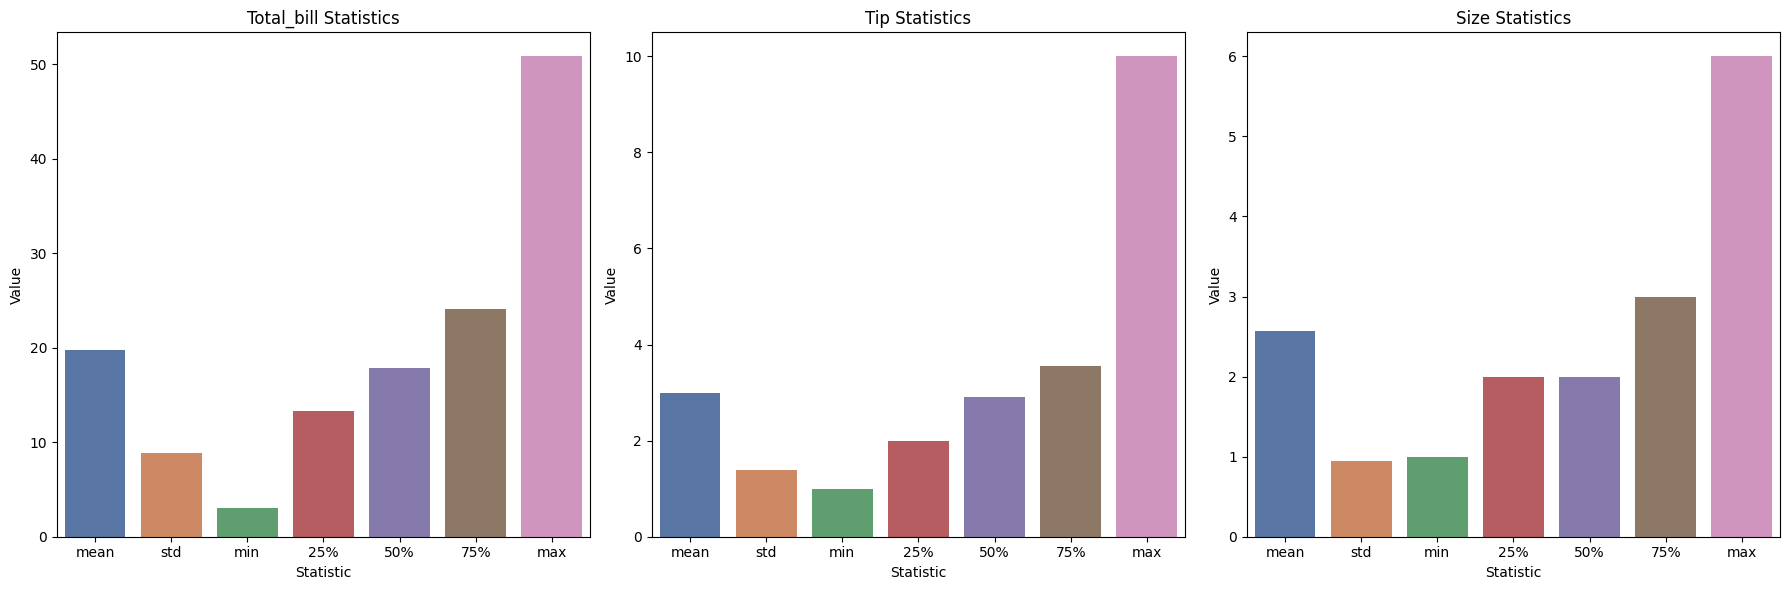

In [29]:
# Lista av variabler
variables = stats_df['Variable'].unique()

# Skapar en figur med tre subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

palette = sns.color_palette("deep", len(stats_df['Statistic'].unique()))

for i, var in enumerate(variables):
    # Filtrerar data för den aktuella variabeln
    data = stats_df[stats_df['Variable'] == var]
    
    # Skapar barplot
    sns.barplot(x='Statistic', y='Value', data=data, palette=palette, ax=axes[i])
    axes[i].set_title(f'{var.capitalize()} Statistics')
    axes[i].set_xticklabels(axes[i].get_xticklabels())

plt.tight_layout()
plt.show()



&nbsp; c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate. 


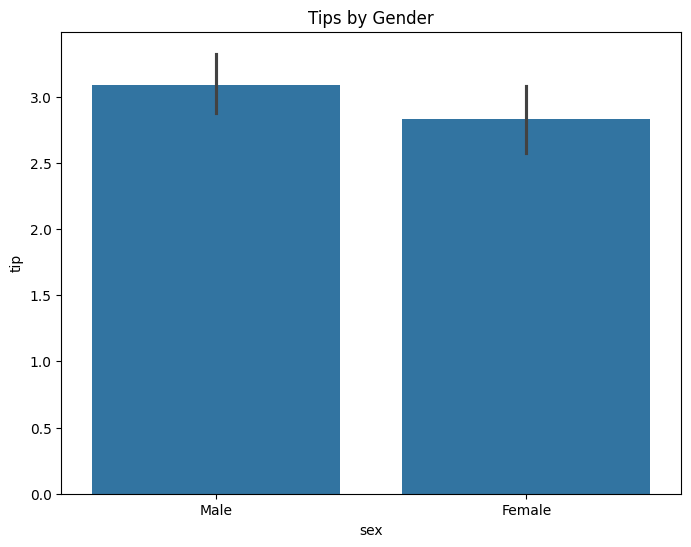

In [31]:
#Skapa barplot för dricks baserat på kön
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='tip', data=tips)
plt.title('Tips by Gender')
plt.show()

C:\Users\joelh\AppData\Local\Temp\ipykernel_13832\4074229316.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day', y='tip', hue="sex", data=tips, ci=None, palette='pastel', order=['Thur', 'Fri', 'Sat', 'Sun'])


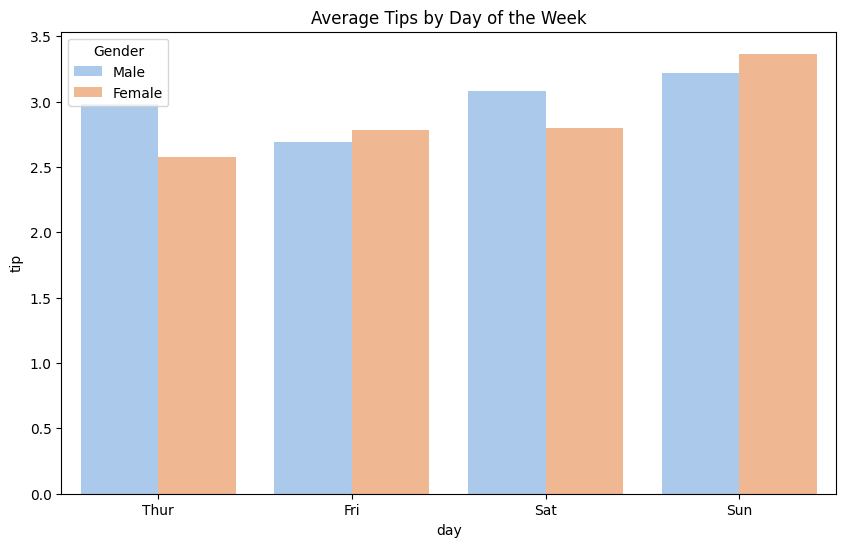

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='tip', hue="sex", data=tips, ci=None, palette='pastel', order=['Thur', 'Fri', 'Sat', 'Sun'])
plt.title('Average Tips by Day of the Week')
plt.legend(title='Gender')
plt.show()

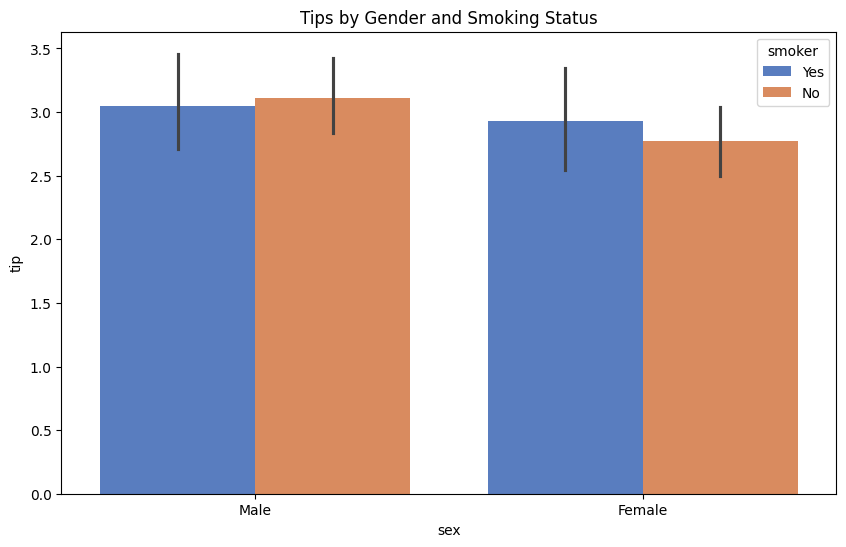

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='tip', hue='smoker', data=tips, palette='muted')
plt.title('Tips by Gender and Smoking Status')
plt.show()


&nbsp; d) Try discuss your findings with yourself/colleague and draw some conclusions if possible. Note that in reality, it is important to be able to communicate your findings so that other people in your team/customers/stakeholders etc. get an understanding of the data and realizes the importance of your role as a data scientist/analyst.

</div>


<div style="max-width:66ch;">

---

## 1. Train|test split (*)

Split the data into training part and testing part, using sklearn's train_test_split with test size of 0.3 and random_state 42.

</div>

In [40]:
from sklearn.model_selection import train_test_split

X = tips.drop(columns=["tip"])
y = tips["tip"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"{X_train.shape = }")
print(f"{y_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (170, 6)
y_train.shape = (170,)
X_test.shape = (74, 6)
y_test.shape = (74,)


<div style="max-width:66ch;">

---
## 2. Feature standardization (*)

We need to normalize the data and in this case will be using feature standardization. Implement this yourself following this formula:

$$X_{train}' = \frac{X_{train}-\mu_{train}}{\sigma_{train}}$$

$$X_{test}' = \frac{X_{test}-\mu_{train}}{\sigma_{train}}$$

, where $'$ denotes scaled, $\mu_{train}$ is the mean of the training data, $\sigma_{train}$ is the standard deviation of the training data. Note that it is very important that the mean and standard deviation is computed from the training data and not from testing data to avoid data leakage. Control the standard deviation and mean of $X_{train}'$ and $X_{test}'$. Is the results as you expect, why, why not?

</div>

In [44]:
import numpy as np

# Beräkna medelvärde och standardavvikelse endast för numeriska kolumner i träningsdatan
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
mu_train = X_train[numeric_columns].mean()
sigma_train = X_train[numeric_columns].std()

# Använd dessa värden för att standardisera endast de numeriska kolumnerna
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_columns] = (X_train[numeric_columns] - mu_train) / sigma_train
X_test_scaled[numeric_columns] = (X_test[numeric_columns] - mu_train) / sigma_train

# Om du vill kan du kontrollera medelvärde och standardavvikelse för de skalerade numeriska kolumnerna
print("Mean of scaled training data (numeric columns):", X_train_scaled[numeric_columns].mean())
print("Standard deviation of scaled training data (numeric columns):", X_train_scaled[numeric_columns].std())
print("Mean of scaled testing data (numeric columns):", X_test_scaled[numeric_columns].mean())
print("Standard deviation of scaled testing data (numeric columns):", X_test_scaled[numeric_columns].std())





Mean of scaled training data (numeric columns): total_bill    6.791953e-17
size         -1.985340e-16
dtype: float64
Standard deviation of scaled training data (numeric columns): total_bill    1.0
size          1.0
dtype: float64
Mean of scaled testing data (numeric columns): total_bill   -0.191380
size         -0.044779
dtype: float64
Standard deviation of scaled testing data (numeric columns): total_bill    0.924957
size          1.066389
dtype: float64


<div style="max-width:66ch;">

---
## 3. Polynomial features (*)

We want to investigate ```Polynomialfeatures``` from scikit-klearn in this task. Start by instantiating an object of type ```PolynomialFeatures``` with degree 2. Now do the following: 

- use the method fit on $X_{train}'$
- transform $X_{train}'$
- transform $X_{test}'$

Compare this transformed $X_{test}'$ with $X_{test}''$ where $X_{test}''$ comes from fitting the polynomial features to $X_{test}'$ and transforming $X_{test}'$. You can check directly by using ```==``` and then sum it up. If the value is same as the length, then you know that they are the same, as a boolean True evaluates to 1. 

</div>


In [51]:
from sklearn.preprocessing import PolynomialFeatures

# Skapa PolynomialFeatures-objektet med grad 2 baserat på X_train_scaled
poly_features = PolynomialFeatures(degree=2)
poly_features.fit(X_train_scaled)  # Anpassa till X_train_scaled

# Transformera X_test_scaled med det anpassade objektet
X_test_poly = poly_features.transform(X_test_scaled)

# Skapa ett nytt PolynomialFeatures-objekt och anpassa det till X_test_scaled
poly_features_test = PolynomialFeatures(degree=2)
poly_features_test.fit(X_test_scaled)  # Anpassa till X_test_scaled
X_test_poly_direct = poly_features_test.transform(X_test_scaled)

# Jämför de två transformerade testdatamängderna
are_equal = (X_test_poly == X_test_poly_direct)

# Summera de booleska värdena för att kontrollera om alla värden är sanna (True)
comparison_sum = are_equal.all(axis=1).sum()

# Kontrollera om summan är lika med antalet rader i X_test_poly
print("The transformations are identical:", comparison_sum == X_test_poly.shape[0])




The transformations are identical: True


<div style="max-width:66ch;">


---
## 4. Polynomial regression  (*)

We will now investigate the training loss and testing loss for different degrees of polynomial. Loop through degrees 1 to 4 (inclusive) and:
- instantiate an object of PolynomialFeatures with that degree
- fit and transform $X_{train}'$ and $X_{test}$ to create polynomial features
- perform linear regression on these polynomial features (polynomial regression)
- predict on both the training and testing data to record RMSE for training and testing for each iteration of the loop

Now plot the results in the same figure. Do you notice anything special? 

</div>

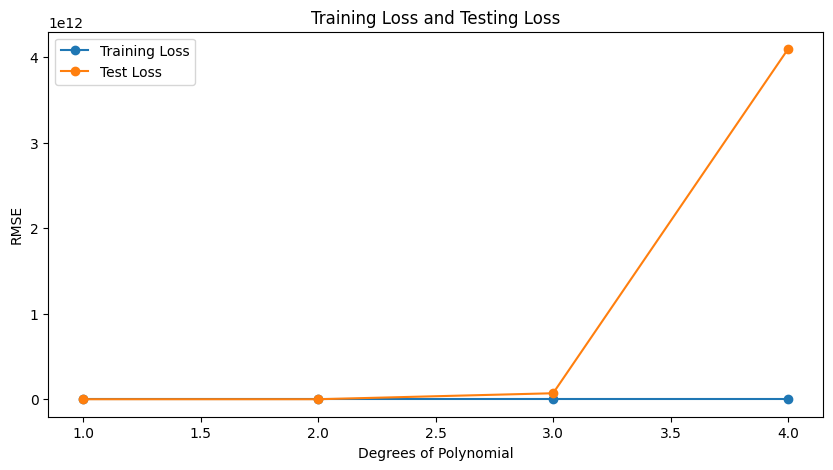

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Förbered listor för att spara RMSE för olika grader
train_rmse = []
test_rmse = []

# Loopa genom polynomgrader från 1 till 4
for degree in range(1, 5):
    # Skapa polynom features för den aktuella graden
    poly = PolynomialFeatures(degree=degree)
    
    # Transformera tränings- och testdatan
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    # Skapa och träna modellen
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Förutspå på tränings- och testdata
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Beräkna RMSE och lägg till i listorna
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Plotta resultaten

plt.figure(figsize=(10, 5))
plt.plot(range(1, 5), train_rmse, label='Training Loss', marker='o')
plt.plot(range(1, 5), test_rmse, label='Test Loss', marker='o')
plt.title('Training Loss and Testing Loss')
plt.xlabel('Degrees of Polynomial')
plt.ylabel('RMSE')
plt.legend()
plt.show()





<div style="max-width:66ch;">

---
## 5. Regularization methods (*)

Now we will try the regularization methods: ridge regression, lasso regression and elasticnet regression. In the following tasks, use degree = 4. 

&nbsp; a) Use ridge regression with cross-validation and test out different alpha-values. I used $\alpha=[0.01, 0.1, 0.5, 1, 5, 10]$ in the cross-validation. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.


In [63]:

from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Antag att X och y är dina ursprungliga dataset utan skalning eller polynomtransformation
# Skapa polynomfeatures och utför Ridge regression inom en pipeline
# Notera att vi använder en pipeline för att automatisera omvandlingen av features
# för både tränings- och testdatan.
pipeline = make_pipeline(
    PolynomialFeatures(degree=4, include_bias=False),
    RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 5, 10], scoring='neg_mean_squared_error', cv=5)
)

# Använd denna pipeline för att träna på hela träningsdatan
pipeline.fit(X_train_scaled, y_train)

# Hitta bästa alfavärdet och vikter efter korsvalidering
best_alpha = pipeline.named_steps['ridgecv'].alpha_
coefficients = pipeline.named_steps['ridgecv'].coef_

# Skriv ut det bästa alfavärdet och vikterna
print(f"Chosen alpha from cross-validation: {best_alpha}")
print("\nWeights:", coefficients)

# För att beräkna MAE, MSE, RMSE kan vi använda pipeline för att göra förutsägelser och sedan jämföra
# med de faktiska värdena.
y_train_pred = pipeline.predict(X_train_scaled)
y_test_pred = pipeline.predict(X_test_scaled)

# Beräkna och skriv ut metrikerna
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print("\nTraining MAE:", mae_train)
print("Training MSE:", mse_train)
print("Training RMSE:", rmse_train)

# Upprepa för testdatan
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("\nTesting MAE:", mae_test)
print("Testing MSE:", mse_test)
print("Testing RMSE:", rmse_test)



Chosen alpha from cross-validation: 10.0

Weights: [ 0.09394093  0.01357608 -0.02287509 ...  0.          0.
  0.00739456]

Training MAE: 0.41919015696331496
Training MSE: 0.349291557917236
Training RMSE: 0.5910089321805856

Testing MAE: 1.1583885111612564
Testing MSE: 3.8342597725013645
Testing RMSE: 1.9581265976696616
